<a href="https://colab.research.google.com/github/wsno1-lim/DF-AI2team/blob/main/99.%EC%8A%A4%ED%84%B0%EB%94%94/Kaggle/%5BKaggle_4%5D_Intro_to_Recurrent_Neural_Networks_LSTM_%7C_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
* LSTM, GRU 로 각각 학습
* GRU는 LSTM과 대체로 비슷한 성능이 나오지만, 데이터 양이 적은 경우 GRU가 조금 더 낫다고 알려져 있다
* 2, 3번에서 제기된 문제에 대해 저자가 직접 실행해보았다.. 결과는?

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
# 야후에서 주가 데이터를 읽는다
from pandas_datareader.data import DataReader

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
dataset = DataReader('IBM', 'yahoo', '2006-01-01', '2018-01-01')

In [ ]:
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,82.550003,80.809998,82.449997,82.059998,11715100.0,53.537857
2006-01-04,82.500000,81.330002,82.199997,81.949997,9832800.0,53.466080
2006-01-05,82.900002,81.250000,81.400002,82.500000,7213400.0,53.824936
2006-01-06,85.029999,83.410004,83.949997,84.949997,8196900.0,55.423355
2006-01-09,84.250000,83.379997,83.900002,83.730003,6851100.0,54.627392


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [ ]:
training_set.shape

(2769, 1)

In [ ]:
test_set.shape

(251, 1)

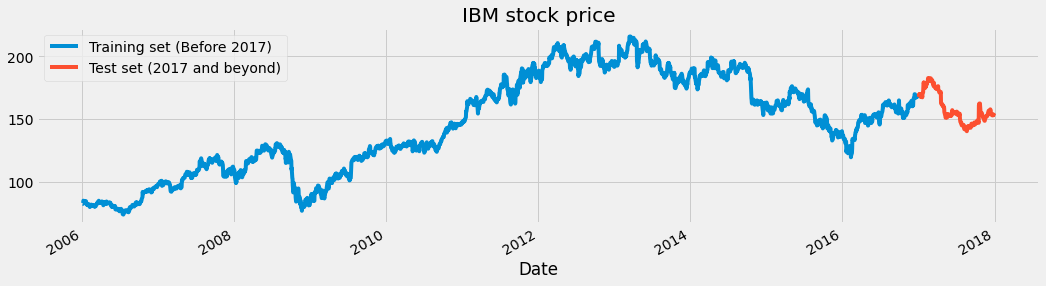

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM 모델 만들기

In [ ]:
# The LSTM architecture
"""
tf.keras.layers.LSTM(
    units, activation='tanh', recurrent_activation='sigmoid',
    use_bias=True, kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros', unit_forget_bias=True,
    kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
    bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2,
    return_sequences=False, return_state=False, go_backwards=False, stateful=False,
    time_major=False, unroll=False, **kwargs
)
"""
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 10s 112ms/step - loss: 0.0281
Epoch 2/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0119
Epoch 3/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0087
Epoch 4/50
85/85 [==============================] - 10s 117ms/step - loss: 0.0077
Epoch 5/50
85/85 [==============================] - 10s 112ms/step - loss: 0.0065
Epoch 6/50
85/85 [==============================] - 10s 114ms/step - loss: 0.0058
Epoch 7/50
85/85 [==============================] - 10s 113ms/step - loss: 0.0053
Epoch 8/50
85/85 [==============================] - 10s 112ms/step - loss: 0.0045
Epoch 9/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0043
Epoch 10/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0039
Epoch 11/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0035
Epoch 12/50
85/85 [==============================] - 9s 112ms/step - loss: 0.0036
Epoch 13/50
85/85 

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

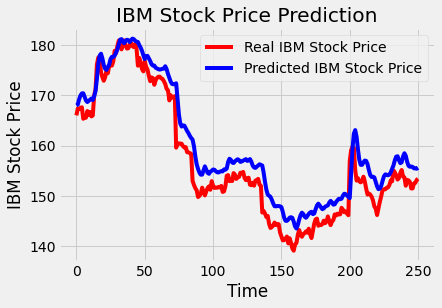

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.784679887149779.


## GRU 사용해보기

In [ ]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(50))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
19/19 [==============================] - 4s 214ms/step - loss: 0.1380
Epoch 2/50
19/19 [==============================] - 4s 219ms/step - loss: 0.0415
Epoch 3/50
19/19 [==============================] - 4s 222ms/step - loss: 0.0107
Epoch 4/50
19/19 [==============================] - 4s 222ms/step - loss: 0.0053
Epoch 5/50
19/19 [==============================] - 4s 221ms/step - loss: 0.0048
Epoch 6/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0042
Epoch 7/50
19/19 [==============================] - 4s 217ms/step - loss: 0.0039
Epoch 8/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0039
Epoch 9/50
19/19 [==============================] - 4s 221ms/step - loss: 0.0036
Epoch 10/50
19/19 [==============================] - 4s 222ms/step - loss: 0.0034
Epoch 11/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0034
Epoch 12/50
19/19 [==============================] - 4s 219ms/step - loss: 0.0031
Epoch 13/50
19/19 [======

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

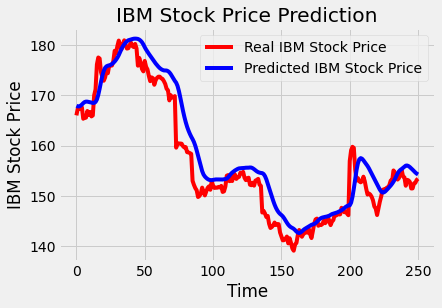

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.7376599065738167.


## 시퀀스 생성하기
* 2, 3번의 문제점이었던 부분(항상 실제값을 사용하여 다음날을 예측함)에 대해, 예측값의 시퀀스를 생성하여 테스트해보기로 한다.
* 아래 시퀀스는 원문의 저자가 조정하여 그나마 나은 값으로 나온 것.

In [ ]:
# train : 2769개, test : 251개
initial_sequence = X_train[2708, :]
sequence = []

print(X_train.shape)
print(initial_sequence.shape)

(2709, 60, 1)
(60, 1)


In [ ]:
# 이전 60일의 값은 학습시킨 값으로 갱신해준다
for i in range(251) :
  new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1], 
                                                                 initial_sequence.shape[0], 1))
  initial_sequence = initial_sequence[1:]
  initial_sequence = np.append(initial_sequence, new_prediction, axis=0)
  sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251, 1))

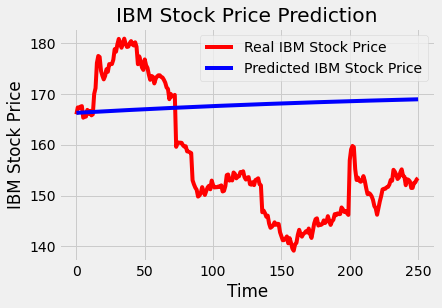

In [ ]:
plot_predictions(test_set, sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

The root mean squared error is 16.67040083968945.


In [ ]:
# LSTM 모델의 경우
initial_sequence2 = X_train[2708, :]
sequence2 = []

# 이전 60일의 값은 학습시킨 값으로 갱신해준다
for i in range(251) :
  new_prediction2 = regressor.predict(initial_sequence2.reshape(initial_sequence2.shape[1], 
                                                                 initial_sequence2.shape[0], 1))
  initial_sequence2 = initial_sequence2[1:]
  initial_sequence2 = np.append(initial_sequence2, new_prediction2, axis=0)
  sequence2.append(new_prediction2)
sequence2 = sc.inverse_transform(np.array(sequence2).reshape(251, 1))

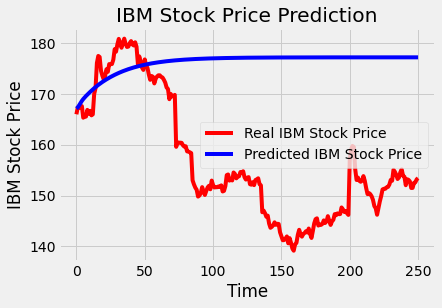

In [ ]:
plot_predictions(test_set, sequence2)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence2)

The root mean squared error is 23.458271539157284.
